Value Function for Policy 1: {(1, 1): 2.3399930755432536, (1, 2): 0, (1, 3): 0, (2, 1): 2.3904662983951246, (2, 2): 0, (2, 3): 0, (3, 1): 1.272094711993035, (3, 2): 0.6744210171329073, (3, 3): -2.848837711902698}
Value Function for Policy 2: {(1, 1): 2.8386979593878006, (1, 2): 2.6530906910968195, (1, 3): 0, (2, 1): 2.000175049716245, (2, 2): 0.9381391688578571, (2, 3): -2.824034355023327, (3, 1): 0, (3, 2): -2.823243719348465, (3, 3): 0}
Value Function for Policy 3: {(1, 1): 0.742996489243764, (1, 2): 1.8700354609633418, (1, 3): 1.240055537501454, (2, 1): 1.3547691827228903, (2, 2): 2.3815818072012784, (2, 3): 1.9466925354827254, (3, 1): 0.5728708692053236, (3, 2): 1.8244849130707574, (3, 3): 0.6105867180240759}


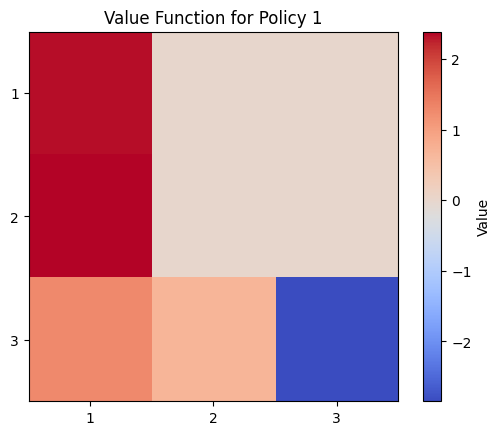

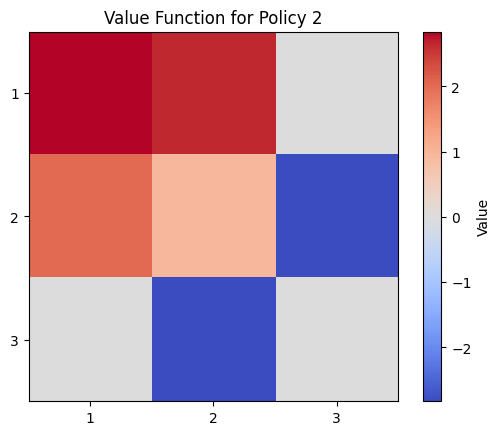

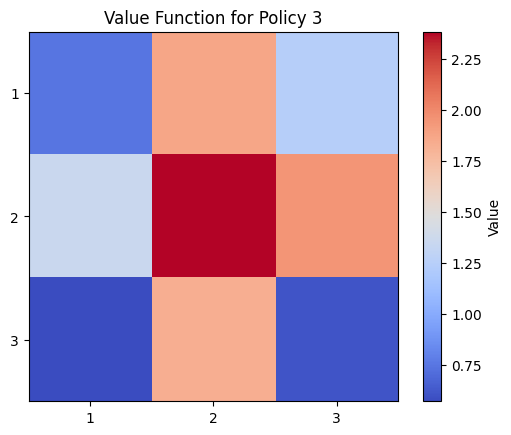

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment: 3x3 grid world with rewards and state transitions
grid_size = (3, 3)
states = [(i, j) for i in range(1, 4) for j in range(1, 4)]
actions = ['up', 'down', 'left', 'right']
state_idx = {state: idx for idx, state in enumerate(states)}

# Reward table (manually constructed based on the exercise description)
rewards = {
    # State (1,1)
    ((1,1), 'right'): 1,
    ((1,1), 'down'): 2/3,

    # State (1,2)
    ((1,2), 'right'): 3/2,
    ((1,2), 'down'): 2,
    ((1,2), 'left'): 1/2,

    # State (1,3)
    ((1,3), 'down'): 5/2,
    ((1,3), 'left'): 1/2,

    # State (2,1)
    ((2,1), 'up'): 1/3,
    ((2,1), 'right'): 4/3,
    ((2,1), 'down'): 3/2,

    # State (2,2)
    ((2,2), 'up'): 1/4,
    ((2,2), 'right'): 3/2,
    ((2,2), 'down'): 3,
    ((2,2), 'left'): 1/3,

    # State (2,3)
    ((2,3), 'up'): 1/4,
    ((2,3), 'down'): 7/2,
    ((2,3), 'left'): 1,

    # State (3,1)
    ((3,1), 'right'): 4/5,
    ((3,1), 'up'): 1/2,

    # State (3,2)
    ((3,2), 'right'): 3,
    ((3,2), 'up'): 4/5,
    ((3,2), 'left'): 1,

    # State (3,3)
    ((3,3), 'up'): 1/2,
    ((3,3), 'left'): 4/5,
}

# Transition table
transitions = {
    # State (1,1)
    ((1,1), 'right'): (1,2),
    ((1,1), 'down'): (2,1),

    # State (1,2)
    ((1,2), 'right'): (1,3),
    ((1,2), 'down'): (2,2),
    ((1,2), 'left'): (1,1),

    # State (1,3)
    ((1,3), 'down'): (2,3),
    ((1,3), 'left'): (1,2),

    # State (2,1)
    ((2,1), 'up'): (1,1),
    ((2,1), 'right'): (2,2),
    ((2,1), 'down'): (3,1),

    # State (2,2)
    ((2,2), 'up'): (1,2),
    ((2,2), 'right'): (2,3),
    ((2,2), 'down'): (3,2),
    ((2,2), 'left'): (2,1),

    # State (2,3)
    ((2,3), 'up'): (1,3),
    ((2,3), 'down'): (3,3),
    ((2,3), 'left'): (2,2),

    # State (3,1)
    ((3,1), 'right'): (3,2),
    ((3,1), 'up'): (2,1),

    # State (3,2)
    ((3,2), 'right'): (3,3),
    ((3,2), 'up'): (2,2),
    ((3,2), 'left'): (3,1),

    # State (3,3)
    ((3,3), 'up'): (2,3),
    ((3,3), 'left'): (3,2),
}

# Invalid actions (where the agent cannot move)
invalid_actions = {
    (1,1): ['up', 'left'],
    (1,2): ['up'],
    (1,3): ['up', 'right'],
    (2,1): ['left'],
    (3,1): ['left', 'down'],
    (3,2): ['down'],
    (3,3): ['down', 'right'],
}

# Define the reward function
def reward_function(state, action):
    return rewards.get((state, action), -1)  # Default reward is -1 for invalid actions

# Define the state transition function
def state_transition(state, action):
    if action in invalid_actions.get(state, []):
        return state  # Invalid move, stay in the same state
    return transitions.get((state, action), state)  # Default to staying in place if transition not defined

# Define policies
def policy_1(state):
    """Policy 1: if row != 3, go down; otherwise, go right."""
    if state[0] != 3:
        return 'down'
    return 'right'

def policy_2(state):
    """Policy 2: various probability distributions based on the state."""
    if state == (2, 2):
        return np.random.choice(actions)  # Equal probability for all actions
    if state != (2, 2):
        return 'down' if state[1] == 2 else 'right'
    return 'down'

def policy_3(state):
    """Policy 3: equidistributed actions for all states."""
    return np.random.choice(actions)

# Define a select_action function to choose an action based on the policy
def select_action(state, policy_func):
    return policy_func(state)

# Initialize the value function for all states
def initialize_value_function(states):
    return {state: 0 for state in states}  # Start with Vπ(s) = 0 for all states

# Compute the Monte Carlo value function for each policy
def monte_carlo_value_function(policy_func, gamma, num_episodes=1000, max_steps=20):
    # Initialize value function
    value_function = initialize_value_function(states)
    
    # Initialize state visit counts for averaging returns
    state_visit_counts = {state: 0 for state in states}
    
    # Run multiple episodes
    for _ in range(num_episodes):
        # Simulate an episode starting from (1,1)
        trajectory = get_trajectory(policy_func, start_state=(1,1), num_moves=max_steps)
        
        # Get discounted returns for the trajectory
        discounted_returns = get_discounted_returns(trajectory, gamma)
        
        # Update the value function for each state in the trajectory
        for i, (state, action, reward) in enumerate(trajectory):
            G = discounted_returns[i]
            state_visit_counts[state] += 1  # Increment visit count for this state
            
            # Update value function using incremental average
            value_function[state] += (G - value_function[state]) / state_visit_counts[state]

    return value_function

def get_trajectory(policy_func, start_state, num_moves=100):
    """Simulate an episode with a given policy and return the trajectory."""
    trajectory = []
    state = start_state
    for _ in range(num_moves):
        action = select_action(state, policy_func)
        reward = reward_function(state, action)
        next_state = state_transition(state, action)
        trajectory.append((state, action, reward))
        state = next_state
    return trajectory

def get_discounted_returns(trajectory, gamma):
    """Calculate the discounted returns for the given trajectory."""
    discounted_returns = []
    G = 0
    for state, action, reward in reversed(trajectory):
        G = reward + gamma * G
        discounted_returns.append(G)
    return list(reversed(discounted_returns))

def plot_value_function(value_function, title):
    values = np.array([value_function[state] for state in states]).reshape(3, 3)
    plt.imshow(values, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xticks([0, 1, 2], ['1', '2', '3'])
    plt.yticks([0, 1, 2], ['1', '2', '3'])
    plt.show()

# Set parameters
gamma = 0.7
num_episodes = 1000
max_steps = 20

# Compute value function for each policy
value_function_policy_1 = monte_carlo_value_function(policy_1, gamma, num_episodes, max_steps)
value_function_policy_2 = monte_carlo_value_function(policy_2, gamma, num_episodes, max_steps)
value_function_policy_3 = monte_carlo_value_function(policy_3, gamma, num_episodes, max_steps)

# Print or analyze the results
print("Value Function for Policy 1:", value_function_policy_1)
print("Value Function for Policy 2:", value_function_policy_2)
print("Value Function for Policy 3:", value_function_policy_3)

# Plot the value functions for each policy
plot_value_function(value_function_policy_1, 'Value Function for Policy 1')
plot_value_function(value_function_policy_2, 'Value Function for Policy 2')
plot_value_function(value_function_policy_3, 'Value Function for Policy 3')
